# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

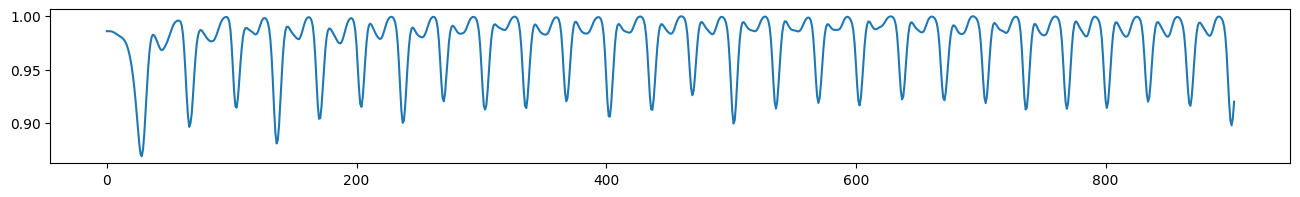

In [3]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

In [20]:
# INSERT YOUR CODE
m = 20
mp = stumpy.stump(ts, m=m)

# chain - Anchored time series chain for the longest chain (docs)
all_chain_set, chain = stumpy.allc(mp[:, 2], mp[:, 3])

print(f"Самая длинная цепочка: {chain}")
print(f"Длина самой длинной цепочки: {len(chain)}")

Самая длинная цепочка: [ 74 143 177 475 807 840]
Длина самой длинной цепочки: 6


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Самая длинная цепочка = 6, для длины мотива = 20.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

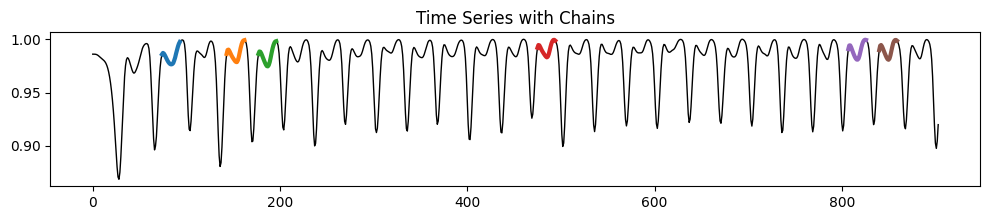

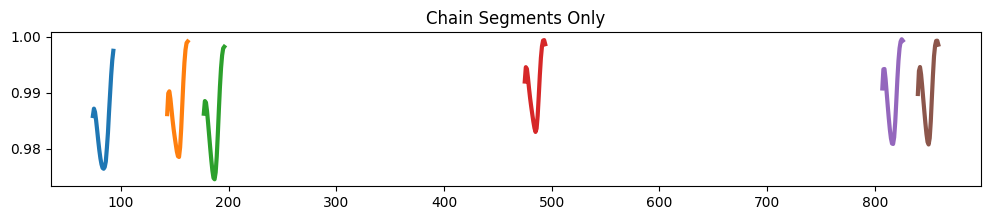

In [22]:
# INSERT YOUR CODE
fig, ax = plt.subplots(figsize=(12, 2))
ax.plot(ts, linewidth=1, color='black')
for i in range(chain.shape[0]):
    y = ts[chain[i]:chain[i]+m]
    x = range(chain[i], chain[i]+m)
    plt.plot(x, y, linewidth=3)

plt.title('Time Series with Chains')
plt.show()

fig, ax = plt.subplots(figsize=(12, 2))
for i in range(chain.shape[0]):
    y = ts[chain[i]:chain[i]+m]
    x = range(chain[i], chain[i]+m)
    plt.plot(x, y, linewidth=3)
    
plt.title('Chain Segments Only')
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

У звеньев одинаковая форма, но может отличаться размер.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

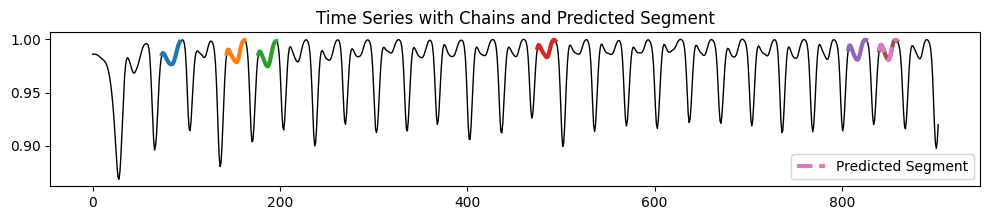

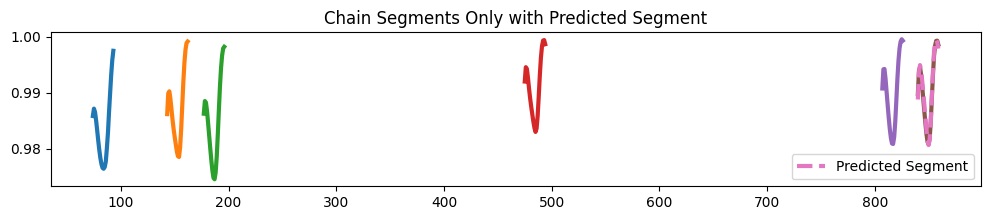

In [44]:
# INSERT YOUR CODE
if len(chain) > 2:
    # Два последних индекса
    last_two_indices = chain[-2:]

    # Извлекаем последние два звена
    segment1 = ts[last_two_indices[0]:last_two_indices[0] + m]
    segment2 = ts[last_two_indices[1]:last_two_indices[1] + m]

    # Предсказание для следующего сегмента, используя разницу
    prediction = segment2 + (segment2 - segment1)  # Предсказание: разница между последними звеньями


    fig, ax = plt.subplots(figsize=(12, 2))
    ax.plot(ts, linewidth=1, color='black')  # Весь временной ряд
    for i in range(chain.shape[0]):
        y = ts[chain[i]:chain[i]+m]
        x = range(chain[i], chain[i]+m)
        ax.plot(x, y, linewidth=3)  # Цепочки на фоне временного ряда
    ax.plot(range(last_two_indices[1], last_two_indices[1] + m), prediction, 
            label="Predicted Segment", linestyle='--', linewidth=3)
    ax.set_title("Time Series with Chains and Predicted Segment")
    ax.legend()
    plt.show()

    # График, показывающий только звенья цепочек и предсказанный сегмент
    fig, ax = plt.subplots(figsize=(12, 2))
    for i in range(chain.shape[0]):
        y = ts[chain[i]:chain[i]+m]
        x = range(chain[i], chain[i]+m)
        ax.plot(x, y, linewidth=3)  # Только звенья цепочек
    ax.plot(range(last_two_indices[1], last_two_indices[1] + m), prediction, 
            label="Predicted Segment", linestyle='--', linewidth=3)
    ax.set_title("Chain Segments Only with Predicted Segment")
    ax.legend()
    plt.show()
else:
    print("Not enough segments to make a prediction.")

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Полученное предсказание совпадает с истиным значением.